## Linear Regression Model using Tensorflow(Gradient Descent)

In [1]:
import tensorflow as tf
import numpy as np
x = np.array([1,2,3])
y = np.array([1,2,3])

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_dim=1)) # output:1 | Activation Function: linear | input:1
sgd=tf.keras.optimizers.SGD(0.01) # Learning Rate = 0.01
model.compile(optimizer=sgd,loss='mse') # mse = (SSE)/(n)
model.fit(x, y, epochs=1000, verbose = 1) #1000 times | verbose=0 not to print

p - loss: 1.5430e-04
Epoch 766/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5356e-04
Epoch 767/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5282e-04
Epoch 768/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5209e-04
Epoch 769/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.5136e-04
Epoch 770/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.5063e-04
Epoch 771/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4991e-04
Epoch 772/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4919e-04
Epoch 773/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4847e-04
Epoch 774/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.4776e-04
Epoch 775/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4705e-04
Epoch 776/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.4634e-04
Epoch 777/1000
1/1 [========================

In [2]:
predicted = model.predict(x)
predicted

array([[0.98959106],
       [1.9977663 ],
       [3.0059414 ]], dtype=float32)

## Logistic Regression Model using Tensorflow(Gradient Descent)

In [3]:
import tensorflow as tf
import numpy as np
x=np.array([[1],[2],[3],[4],[5],[6]])
y = np.array([[0],[0],[0],[1],[1],[1]])

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_dim=1)) # output:1 | Activation Function: Sigmoid | input:1
model.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='binary_crossentropy') # loss function (cost function): binary_cross_entropy
model.fit(x, y, epochs=2000, verbose = 1) # 1 datasets * 2000 epochs => 2000 updates

0
1/1 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 1758/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1147
Epoch 1759/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1146
Epoch 1760/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1146
Epoch 1761/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1146
Epoch 1762/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1145
Epoch 1763/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1145
Epoch 1764/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1145
Epoch 1765/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1144
Epoch 1766/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1144
Epoch 1767/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1144
Epoch 1768/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1143
Epoch 1769/2000
1/1 [=========

In [4]:
predicted = model.predict(x)
predicted

array([[0.00435549],
       [0.04025552],
       [0.2868157 ],
       [0.7940674 ],
       [0.9736643 ],
       [0.9971869 ]], dtype=float32)

# MNIST Database 
## Modified National Institute of Standards and Technology Database

* is a large database of handwritten digits that is commonly used for training various image processing systems.
* was created by "re-mixing" the samples from NIST's original datasets.
* contains 60,000 training images and 10,000 testing images.
* the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.
* In module ```tensorflow.keras.datasets.mnist```

![MnistExamples.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

from [wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

Make logistic model using tensorflow
* One picture has 28x28=784 pixels. Serialize to 784 independent variables.
* Each pixel has value between 0~255. Normalize in range 0~1.
* Target(train_y and test_y) has value between 0~9. Perform categorical encoding (One-hot Encoding).

train_x shape: (60000, 28, 28)
train_x[0] shape: (28, 28)


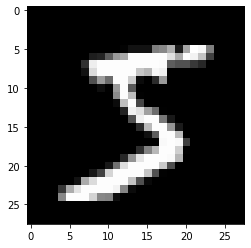

(60000,)
train_y[0] value: 5
train_y[0] is one-hot encoded to: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Figure out the shape of train and test set.

import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets

mnist = datasets.mnist # Load MNIST Database
(train_x, train_y), (test_x, test_y) = mnist.load_data() # split to train set and test set.
print("train_x shape:",train_x.shape)

image = train_x[0]
print("train_x[0] shape:",image.shape)

import matplotlib.pyplot as plt
plt.imshow(image, 'gray')
plt.show()

print(train_y.shape)
label = train_y[0]
print("train_y[0] value:",label)
from tensorflow.keras.utils import to_categorical
print("train_y[0] is one-hot encoded to:",to_categorical(label, 10) )

In [6]:
# Reshape and perform one-hot encoding.

import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print("train_x.shape:",train_x.shape, "train_y[0]:", train_y[0])

train_x = train_x.reshape(-1,784) # (60000,784) Serialize 28*28 data to 784
test_x = test_x.reshape(-1,784) # -1 means unknown dimension: numpy automatically figures out.
train_x = train_x / 255 # pixel has value between 0~255
test_x = test_x / 255 # normalize pixel value

train_y_onehot = to_categorical(train_y) # y has literal integer values
test_y_onehot = to_categorical(test_y) # one-hot encoding

print("Serialized, reshaped and one-hot encoded.")

print("train_x.shape:",train_x.shape, "train_y_onehot[0]:", train_y_onehot[0])

train_x.shape: (60000, 28, 28) train_y[0]: 5
Serialized, reshaped and one-hot encoded.
train_x.shape: (60000, 784) train_y_onehot[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Add layer and make it fit (Learning)

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='softmax', input_dim=784)) # output: 10 (0~9) | Activation Function: Softmax | input:784 (Serialized 28*28)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # Loss Function: Categorical Cross Entropy
model.fit(train_x, train_y_onehot, epochs=5) # 5 epochs, default batch_size 32, 60000 datasets => 60000/32 * 5 = 1875*5 updates

2021-07-17 20:27:26.663071: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7776 - accuracy: 0.8141
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4560 - accuracy: 0.8813
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8970
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.9008


In [8]:
# Evaluate and predict

print("Evaluation(Loss, Metric(accuracy)):",model.evaluate(test_x, test_y_onehot))

predicted = model.predict(test_x)
print("predited[0]:",predicted[0])
print("test_y_onehot[0]:", test_y_onehot[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.9084
Evaluation(Loss, Metric(accuracy)): [0.3375749886035919, 0.9083999991416931]
predited[0]: [1.9096737e-04 9.7606653e-07 1.6131661e-04 1.6194476e-03 3.6754835e-05
 7.9697136e-05 2.4661099e-06 9.9468118e-01 1.9758838e-04 3.0295441e-03]
test_y_onehot[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# **※ Categorical Encoding ※**
* Indexing non-numerical data to certain number.
* Converting non-numerical data to numeric data.

1. Label Encoding: Indexing non-numerical datas to numbers in order which the original datas have.
2. **One-hot Encoding**: Give each category each bit.
(Giving normal integer (Label Encoding) might cause learning false relationship between non-related variables)

ex)
$$
Y= \begin{pmatrix} 0 \\ 1 \\ 5 \\ 9 \end{pmatrix} \quad
\xrightarrow{One-hot \, Encoding} \quad
Y = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

Then, hypothesis $H(X)$ would be in same size of matrix like example following:
$$
H(X)= 
\begin{pmatrix}
0.7 & 0.2 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.9 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0 & 0 \\
0 & 0 & 0 & 0.2 & 0 & 0.5 & 0 & 0 & 0.3 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.9 \\
\end{pmatrix}
$$

## Categorical Cross Entropy function:
$$Cost(W)=\sum \limits_{i=1}^n \sum \limits_{j=1}^c -y_{ij} ln(H(X)_{ij})$$

Categorical cross entropy function above can be derived from binary cross entropy function as below:
$$Cost(W)=\sum \limits_{i=1}^n \big[ -y_iln(H(X)) + (1-y_i) -ln(1-H(X)) \big]$$
$$=\sum \limits_{i=1}^n \big[ -y_{i1}ln(H(X)) + (1-y_{i1}) -ln(1-H(X)) \big]$$
$$=\sum \limits_{i=1}^n \big[ -y_{i1}ln(H(X)) + y_{i2} -ln(1-H(X)) \big]$$
$$=\sum \limits_{i=1}^n \sum \limits_{j=1}^c -y_{ij} ln(H(X)_{ij})$$

# Softmax Function

* is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

Each one-hot encoded category is affect to each other: only one category can be '1', and elses must be '0'. (e.g. \[0, 1, 1, 0, 0, 1, 0\] is illegal because it indicates three categories in one case.)

But if normal activation function (e.g. sigmoid) was given, then it calculates its probability independently.

Softmax Function for example above (MNIST Database) might be defined as follow:

$$
P_{sigmoid}(Y=0)=\frac{1}{1+exp(-b_0 - w_{1,1} x_1 - \cdots - w_{784,1} x_{784})} \\
P_{sigmoid}(Y=1)=\frac{1}{1+exp(-b_1 - w_{1,2} x_1 - \cdots - w_{784,2} x_{784})} \\
\vdots \\
P_{sigmoid}(Y=9)=\frac{1}{1+exp(-b_0 - w_{1,10} x_1 - \cdots - w_{784,10} x_{784})}\\
$$

In order to satisfy $P(Y=0)+P(Y=1)+\cdots+P(Y=9)=1$, define as

$$
P(Y=0)=\frac{P_{sigmoid}(Y=0)}{P_{sigmoid}(Y=0)+P_{sigmoid}(Y=1)+\cdots+P_{sigmoid}(Y=9)} \\
P(Y=1)=\frac{P_{sigmoid}(Y=1)}{P_{sigmoid}(Y=0)+P_{sigmoid}(Y=1)+\cdots+P_{sigmoid}(Y=9)} \\
\vdots \\
P(Y=9)=\frac{P_{sigmoid}(Y=9)}{P_{sigmoid}(Y=0)+P_{sigmoid}(Y=1)+\cdots+P_{sigmoid}(Y=9)}\\
$$

# SGD: Stochastic Gradient Descent

* is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable).
* can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (**calculated from a randomly selected subset of the data**).
* Especially in high-dimensional optimization problems **this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate**. (surface would be distorted roughly due to fewer sample case)
* **Lower convergence rate might lead potential danger of falling into local minimum** (not global)

pseudocode:
* Choose an initial vector of parameters $w$ and learning rate $\eta$ .
* Repeat until an approximate minimum is obtained:
    * Randomly shuffle examples in the training set.
    * For $i=1,2,\cdots,n$, do:
        * $w:=w-\eta \nabla Q_{i}(w)$

from [wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

# BGD: Batch Gradient Descent
* implemented **multiple 'Batch'** on SGD.
* is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces
* Multiple Batchs gives easier parallel processing on multiple GPU

[shuuki4.github.io](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)

[ruder.io](https://ruder.io/optimizing-gradient-descent/)

# Epochs
* One epoch is **when an entire dataset is passed forward and backward through the neural network only once**.

# Batch Size
* Total number of training examples present in a single batch
* $(Size \, of \, Dataset) \div (Batch \, Size) = (Number \, of \, Batchs)$
* default batch size is 32


e.g.) Size of Dataset = 60000, Batch Size = 32, Epochs = 5

Size of one batch is 32 and there are 1875 batchs (=60000/32).

One epoch is when all 1875 batchs (each batch includes 32 data) are run so that all 60000 data are learned.

If it learns in 5 epochs, then weight would be updated 1875 * 5 = 9375 times.

[towardsdatascience.com](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)